In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("kaggle_processed.csv")
df.head()

,artist,song,Lyrics,Genre,Genre_encoded,Pre_Processed_Text
0,Michael Jackson,If'n I Was God,ifn god well spite wouldnt set sun night til e...,Pop,2,see sun right set wise except oh til explain k...
1,Cher,Love Is The Groove,east west every bird seek nest everyone seek h...,Pop,2,hold like goe look possibl light till road pen...
2,Bruno Mars,Never Say U Can't,intro oh x4 verse 1 little boy barely strong e...,Pop,2,could friend enough would help 1 ah strong wor...
3,Britney Spears,Pepsi World Cup,whao oh oh oh ready whao oh oh oh yeah though ...,Pop,2,dream faultier tast victori see feel gonna hey...
4,Elton John,Boogie Pilgrim,crime streets read everyday papers justice nee...,Pop,2,low feel paper pilgrim someth live weather lif...


<Axes: xlabel='Genre'>

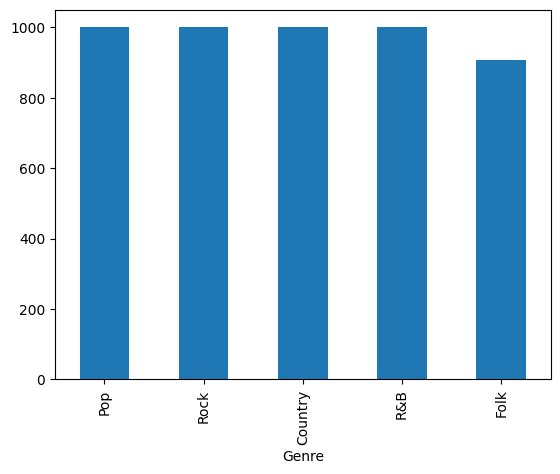

In [3]:
df['Genre'].value_counts().plot(kind='bar')

In [5]:
from collections import Counter
import pandas as pd

# Assuming 'df' is your DataFrame
all_words = ' '.join(df['Pre_Processed_Text']).split()
word_freq = Counter(all_words)

# Convert to DataFrame for easy viewing
top_words_df = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])
print(top_words_df)

    Word  Frequency
0   love       3153
1   know       2851
2     im       2601
3   dont       2360
4   like       2261
5   time       2097
6   come       2013
7     go       1978
8    get       1970
9    one       1923
10   see       1851
11   say       1843
12  make       1772
13  feel       1751
14   got       1729
15    oh       1654
16   way       1583
17  want       1552
18   let       1535
19  take       1534


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Initialize vectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['Pre_Processed_Text'])

# Get top TF-IDF words across the dataset
tfidf_sum = tfidf_matrix.sum(axis=0).A1 
words = vectorizer.get_feature_names_out()
tfidf_scores = dict(zip(words, tfidf_sum))

# Convert to DataFrame
tfidf_df = pd.DataFrame(sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)[:20], columns=['Word', 'TF-IDF Score'])
print(tfidf_df)


     Word  TF-IDF Score
0    love    161.567272
1    know    141.822030
2      im    129.276551
3    dont    123.926912
4    time    121.586184
5    come    118.441099
6    feel    118.378470
7      go    116.546052
8    like    115.894126
9     get    113.316320
10    say    112.076679
11    see    110.769240
12    one    110.643728
13   make    109.959414
14   want    105.629704
15     oh    105.558618
16  heart    105.328831
17    let    103.261789
18    way    103.024637
19    got    101.223034


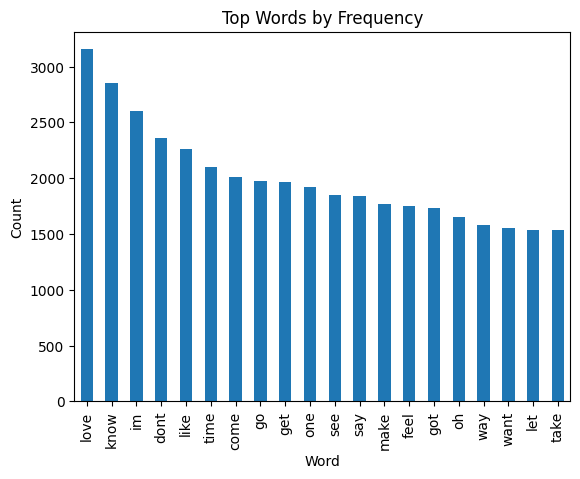

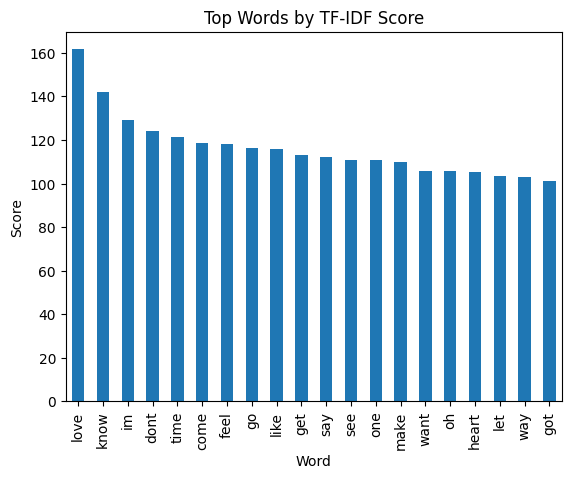

In [7]:
import matplotlib.pyplot as plt

# Plot Counter-based top words
top_words_df.plot(kind='bar', x='Word', y='Frequency', legend=False, title='Top Words by Frequency')
plt.ylabel("Count")
plt.show()

# Plot TF-IDF-based top words
tfidf_df.plot(kind='bar', x='Word', y='TF-IDF Score', legend=False, title='Top Words by TF-IDF Score')
plt.ylabel("Score")
plt.show()



[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


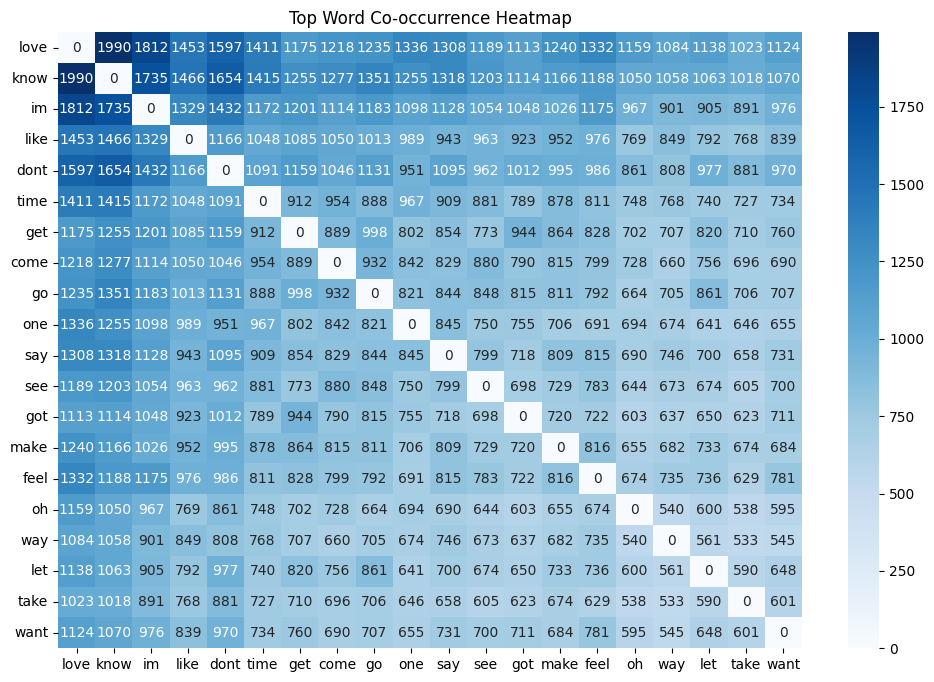

In [8]:
!pip install seaborn
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Get term co-occurrence matrix
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Pre_Processed_Text'])
Xc = (X.T * X)
Xc.setdiag(0)

# Convert to DataFrame
co_occurrence_df = pd.DataFrame(Xc.toarray(), columns=vectorizer.get_feature_names_out(), index=vectorizer.get_feature_names_out())

# Select top N words
top_words = co_occurrence_df.sum().sort_values(ascending=False).head(20).index
top_matrix = co_occurrence_df.loc[top_words, top_words]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(top_matrix, cmap="Blues", annot=True, fmt="d")
plt.title("Top Word Co-occurrence Heatmap")
plt.show()


In [9]:
df.shape

(4907, 6)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]]  # Filter columns
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow  # Use integer division to ensure int
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)  # nGraphRow is now an integer
        columnDf = df.iloc[:, i]
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

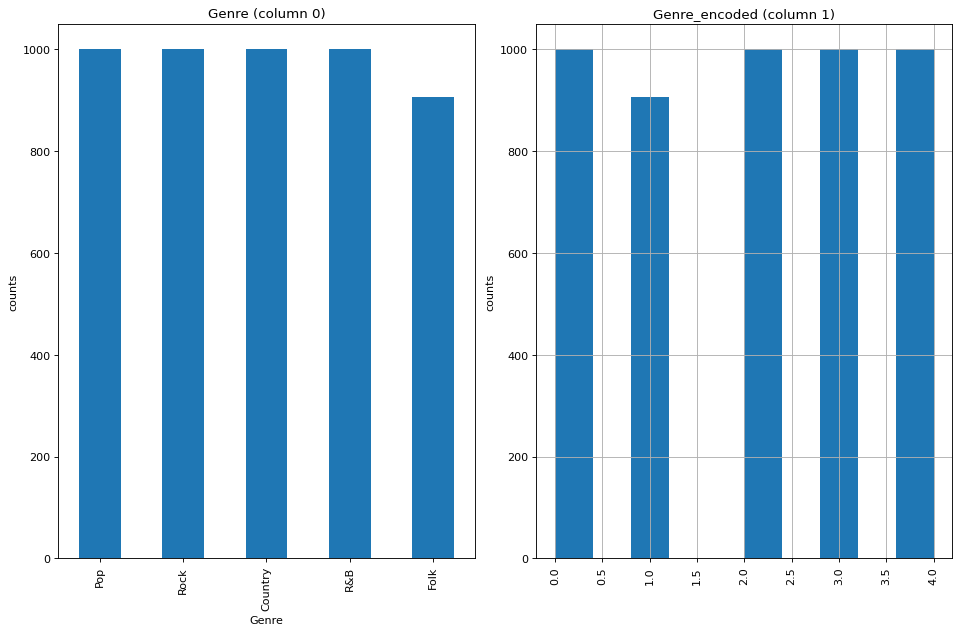

In [11]:
plotPerColumnDistribution(df, 10, 5)

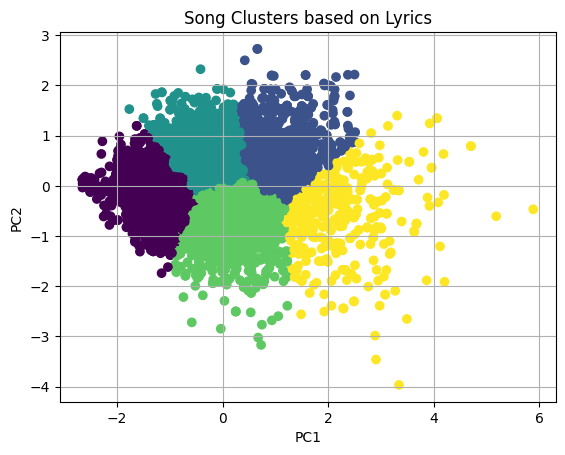

In [13]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

pca = PCA(n_components=2)
reduced = pca.fit_transform(X.toarray())

# Cluster
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(reduced)

# Plot clusters
plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='viridis')
plt.title("Song Clusters based on Lyrics")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()


In [14]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load model and tokenizer
model_name = "sentence-transformers/all-MiniLM-L6-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
        embeddings = outputs.last_hidden_state[:, 0, :]  # CLS token
    return embeddings.squeeze().numpy()

# Apply to your DataFrame
bert_features = df['Pre_Processed_Text'].apply(get_bert_embedding)
bert_matrix = np.vstack(bert_features.to_numpy())

print("BERT Embedding shape:", bert_matrix.shape)  # e.g., (1000 songs, 384)


BERT Embedding shape: (4907, 384)


In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(df['Genre']) 

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict & evaluate
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Accuracy: 0.5621
              precision    recall  f1-score   support

     Country       0.60      0.66      0.63       194
        Folk       0.59      0.40      0.47       177
         Pop       0.57      0.47      0.52       215
         R&B       0.60      0.71      0.65       195
        Rock       0.47      0.56      0.51       201

    accuracy                           0.56       982
   macro avg       0.57      0.56      0.56       982
weighted avg       0.57      0.56      0.56       982



In [17]:
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from tqdm import tqdm

from tqdm import tqdm
tqdm.pandas()

# 1. Label encode the target column
le = LabelEncoder()
df['Genre_encoded'] = le.fit_transform(df['Genre'])
y = df['Genre_encoded']

# 2. Load BERT model and tokenizer
model_name = "sentence-transformers/all-MiniLM-L6-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
model.eval() 

# 3. Mean Pooling Function for Embeddings
def get_bert_mean_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
        token_embeddings = outputs.last_hidden_state
        attention_mask = inputs['attention_mask'].unsqueeze(-1)
        mean_pool = (token_embeddings * attention_mask).sum(1) / attention_mask.sum(1)
        return mean_pool.squeeze().numpy()

# 4. Generate embeddings
print("Extracting BERT embeddings...")
X = np.vstack(df['Pre_Processed_Text'].progress_apply(get_bert_mean_embedding))

# 5. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 7. Balance training data with SMOTE
print("Balancing classes using SMOTE...")
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 8. Train a Logistic Regression model
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_res, y_train_res)

# 9. Evaluate
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Extracting BERT embeddings...


100%|███████████████████████████████████████| 4907/4907 [01:04<00:00, 76.16it/s]
/Users/shruthi/Library/CloudStorage/OneDrive-ArizonaStateUniversity/Data Mining/Project/Code/venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


Balancing classes using SMOTE...

✅ Accuracy: 0.4277

📊 Classification Report:
              precision    recall  f1-score   support

     Country       0.49      0.46      0.47       200
        Folk       0.48      0.51      0.49       182
         Pop       0.37      0.35      0.36       200
         R&B       0.40      0.42      0.41       200
        Rock       0.40      0.41      0.40       200

    accuracy                           0.43       982
   macro avg       0.43      0.43      0.43       982
weighted avg       0.43      0.43      0.43       982



In [18]:
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from tqdm import tqdm


# Optional: drop rare classes 
top_genres = df['Genre'].value_counts().nlargest(5).index
df = df[df['Genre'].isin(top_genres)].reset_index(drop=True)

# Encode target labels
le = LabelEncoder()
df['Genre_encoded'] = le.fit_transform(df['Genre'])
y = df['Genre_encoded']

# Load BERT tokenizer and model
model_name = "sentence-transformers/all-MiniLM-L6-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
model.eval()

# BERT mean pooling
def get_bert_mean_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
        token_embeddings = outputs.last_hidden_state
        attention_mask = inputs['attention_mask'].unsqueeze(-1)
        mean_pool = (token_embeddings * attention_mask).sum(1) / attention_mask.sum(1)
        return mean_pool.squeeze().numpy()

# Apply mean pooling to all rows with progress bar
tqdm.pandas()
print("Extracting BERT embeddings...")
X = np.vstack(df['Pre_Processed_Text'].progress_apply(get_bert_mean_embedding))

# Split BEFORE scaling or SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE for class balancing
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Scale after SMOTE
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
clf.fit(X_train_res, y_train_res)

# Evaluate
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {acc:.4f}\n")
print(" Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Extracting BERT embeddings...


100%|███████████████████████████████████████| 4907/4907 [01:03<00:00, 77.79it/s]
/Users/shruthi/Library/CloudStorage/OneDrive-ArizonaStateUniversity/Data Mining/Project/Code/venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(



✅ Accuracy: 0.4868

📊 Classification Report:
              precision    recall  f1-score   support

     Country       0.50      0.47      0.48       200
        Folk       0.43      0.54      0.48       182
         Pop       0.49      0.34      0.40       200
         R&B       0.52      0.63      0.57       200
        Rock       0.50      0.47      0.48       200

    accuracy                           0.49       982
   macro avg       0.49      0.49      0.48       982
weighted avg       0.49      0.49      0.48       982



🔁 Extracting BERT embeddings...


100%|███████████████████████████████████████| 4907/4907 [01:10<00:00, 69.80it/s]
/Users/shruthi/Library/CloudStorage/OneDrive-ArizonaStateUniversity/Data Mining/Project/Code/venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


⚖️ Applying SMOTE to balance classes...
🚀 Training LightGBM classifier...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008588 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 97920
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 384
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

/Users/shruthi/Library/CloudStorage/OneDrive-ArizonaStateUniversity/Data Mining/Project/Code/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


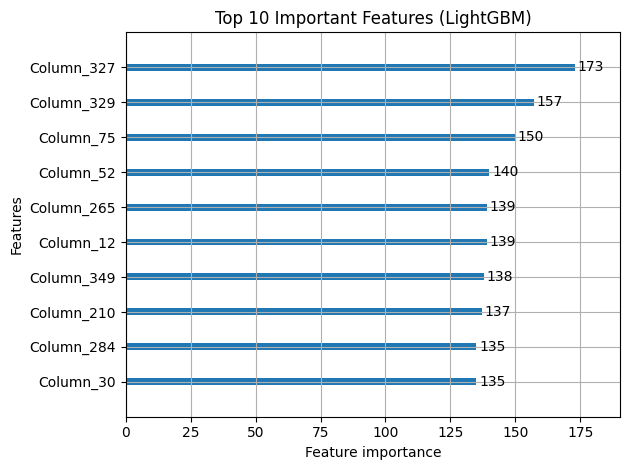

In [19]:
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from tqdm import tqdm
import lightgbm as lgb
import matplotlib.pyplot as plt


# keep only top genres 
top_genres = df['Genre'].value_counts().nlargest(5).index
df = df[df['Genre'].isin(top_genres)].reset_index(drop=True)

# Encode target labels
le = LabelEncoder()
df['Genre_encoded'] = le.fit_transform(df['Genre'])
y = df['Genre_encoded']

# Load BERT model and tokenizer
model_name = "sentence-transformers/all-MiniLM-L6-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
model.eval()

# Define BERT mean pooling
def get_bert_mean_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
        token_embeddings = outputs.last_hidden_state
        attention_mask = inputs['attention_mask'].unsqueeze(-1)
        mean_pool = (token_embeddings * attention_mask).sum(1) / attention_mask.sum(1)
        return mean_pool.squeeze().numpy()

# Extract BERT embeddings
tqdm.pandas()
print(" Extracting BERT embeddings...")
X = np.vstack(df['Pre_Processed_Text'].progress_apply(get_bert_mean_embedding))

# Train-test split (BEFORE scaling/SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Balance the training data using SMOTE
print("⚖️ Applying SMOTE to balance classes...")
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Scale features AFTER SMOTE
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Train LightGBM classifier
print(" Training LightGBM classifier...")
clf = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=len(le.classes_),
    learning_rate=0.1,
    n_estimators=200,
    max_depth=8,
    class_weight='balanced',
    random_state=42
)
clf.fit(X_train_res, y_train_res)

# Evaluate the model
print("Evaluating model...")
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"\nAccuracy: {acc:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Plot feature importance
print("Plotting top features...")
lgb.plot_importance(clf, max_num_features=10)
plt.title("Top 10 Important Features (LightGBM)")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm

# STEP 1: Label Encoding
top_genres = df['Genre'].value_counts().nlargest(5).index
df = df[df['Genre'].isin(top_genres)].reset_index(drop=True)

le = LabelEncoder()
df['Genre_encoded'] = le.fit_transform(df['Genre'])

# STEP 2: Load BERT
model_name = "sentence-transformers/all-MiniLM-L6-v2"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)
model.eval()

# STEP 3: Define BERT Mean Pooling
def get_bert_mean_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
        token_embeddings = outputs.last_hidden_state
        attention_mask = inputs['attention_mask'].unsqueeze(-1)
        mean_pool = (token_embeddings * attention_mask).sum(1) / attention_mask.sum(1)
        return mean_pool.squeeze().numpy()

# STEP 4: Safely Extract Embeddings
tqdm.pandas()
embeddings = []
bad_rows = []

for i, text in enumerate(tqdm(df['Pre_Processed_Text'], desc="Extracting BERT embeddings")):
    try:
        emb = get_bert_mean_embedding(text)
        embeddings.append(emb)
    except Exception as e:
        print(f"⚠️ Skipping row {i} due to error: {e}")
        bad_rows.append(i)

# Final X and y
X = np.vstack(embeddings)
df_cleaned = df.drop(index=bad_rows).reset_index(drop=True)
y = df_cleaned['Genre_encoded'].values

# STEP 5: Split, SMOTE, Scale
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# STEP 6: PyTorch NN Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

X_train_tensor = torch.tensor(X_train_res, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train_res, dtype=torch.long).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.long).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

# STEP 7: Define NN Model
class SimpleNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout=0.3):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        return self.fc2(x)

# Model config
input_dim = X_train_tensor.shape[1]
hidden_dim = 128
output_dim = len(le.classes_)
lr = 0.001
epochs = 20

model = SimpleNN(input_dim, hidden_dim, output_dim).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

# STEP 8: Training Loop
print("Training simple NN...")
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        optimizer.zero_grad()
        preds = model(xb)
        loss = criterion(preds, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")

# STEP 9: Evaluation
print("Evaluating simple NN...")
model.eval()
all_preds = []
with torch.no_grad():
    for xb, _ in test_loader:
        preds = model(xb)
        all_preds.append(torch.argmax(preds, dim=1))

y_pred_nn = torch.cat(all_preds).cpu().numpy()
y_true = y_test_tensor.cpu().numpy()

acc = accuracy_score(y_true, y_pred_nn)
print(f"\nAccuracy: {acc:.4f}")
print("Classification Report:")
print(classification_report(y_true, y_pred_nn, target_names=le.classes_))
